# Project Title : “Crop Production Prediction in Tamil Nadu.”

## Introduction:

          Agriculture plays a vital role in Tamil Nadu’s economy, with crop production being one of the key factors influencing food security and farmers’ income. Understanding the trends and predicting crop production can help the government, researchers, and farmers make better decisions about resource allocation, seasonal planning, and productivity improvement.

          This project focuses on analyzing and predicting crop production in Tamil Nadu using data-driven techniques. The analysis begins with filtering Tamil Nadu data from an all-India agricultural dataset, followed by thorough data preprocessing and normalization. Exploratory Data Analysis (EDA) is then performed to identify patterns and relationships among crops, seasons, districts, and production levels. Finally, regression models—Simple Linear Regression (SLR) and Multiple Linear Regression (MLR)—are applied to predict crop production and evaluate the accuracy of the models.

## Project Statement :  

          The aim of this project is to analyze agricultural crop production data of Tamil Nadu and develop predictive models to estimate future crop yields. By applying data preprocessing, normalization, and regression techniques, the project seeks to understand how different factors such as district, season, and crop type influence production levels. The insights gained from this analysis can help improve planning, optimize cultivation strategies, and support data-driven agricultural decision-making in Tamil Nadu.

In [2]:
import numpy as np
import pandas as pd

In [3]:
# checking dataset is complete or not
dataset = np.loadtxt("India_Agriculture_Crop_Production.csv")

ValueError: could not convert string 'State_Name,District_Name,Crop,Crop_Year,Season,Area,Production,Yield' to float64 at row 0, column 1.

In [4]:
# so, dataset is contains strings 
raw_dataset = np.genfromtxt("India_Agriculture_Crop_Production.csv", delimiter = ",", dtype = np.str_)
raw_dataset

array([['State_Name', 'District_Name', 'Crop', ..., 'Area', 'Production',
        'Yield'],
       ['Andaman and Nicobar Islands', 'NICOBARS', 'Arecanut', ...,
        '1254', '2061', '1.64354067'],
       ['Andaman and Nicobar Islands', 'NICOBARS', 'Arecanut', ...,
        '1258', '2083', '1.655802862'],
       ...,
       ['Manipur', 'TAMENGLONG', '', ..., '', '', ''],
       ['Manipur', 'THOUBAL', '', ..., '', '', ''],
       ['Manipur', 'UKHRUL', '', ..., '', '', '']],
      shape=(345408, 8), dtype='<U44')

In [5]:
print(" fields in the dataset : ",raw_dataset[0,:])

 fields in the dataset :  ['State_Name' 'District_Name' 'Crop' 'Crop_Year' 'Season' 'Area'
 'Production' 'Yield']


In [6]:
raw_dataset[:,0]

array(['State_Name', 'Andaman and Nicobar Islands',
       'Andaman and Nicobar Islands', ..., 'Manipur', 'Manipur',
       'Manipur'], shape=(345408,), dtype='<U44')

In [7]:
tamilnadu_data = raw_dataset[raw_dataset[:,0]=='Tamil Nadu']
tamilnadu_data

array([['Tamil Nadu', 'COIMBATORE', 'Arecanut', ..., '1589', '', '0'],
       ['Tamil Nadu', 'COIMBATORE', 'Arecanut', ..., '1577', '', '0'],
       ['Tamil Nadu', 'DHARMAPURI', 'Arecanut', ..., '203', '', '0'],
       ...,
       ['Tamil Nadu', 'SALEM', 'Wheat', ..., '25', '12', '0.48'],
       ['Tamil Nadu', 'THE NILGIRIS', 'Wheat', ..., '430', '20',
        '0.046511628'],
       ['Tamil Nadu', 'THE NILGIRIS', 'Wheat', ..., '91', '44',
        '0.483516484']], shape=(18525, 8), dtype='<U44')

In [8]:
tamilnadu_data[:,3]

array(['2002-03', '2003-04', '2002-03', ..., '2000-01', '1998-99',
       '2000-01'], shape=(18525,), dtype='<U44')

In [9]:
np.unique(tamilnadu_data[:,4])

array(['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter'],
      dtype='<U44')

In [10]:
np.unique(tamilnadu_data[:,1])

array(['ARIYALUR', 'CHENGALPATTU', 'CHENNAI', 'COIMBATORE', 'CUDDALORE',
       'DHARMAPURI', 'DINDIGUL', 'ERODE', 'KALLAKURICHI', 'KANCHIPURAM',
       'KANNIYAKUMARI', 'KARUR', 'KRISHNAGIRI', 'MADURAI', 'NAGAPATTINAM',
       'NAMAKKAL', 'PERAMBALUR', 'PUDUKKOTTAI', 'RAMANATHAPURAM',
       'RANIPET', 'SALEM', 'SIVAGANGA', 'TENKASI', 'THANJAVUR',
       'THE NILGIRIS', 'THENI', 'THIRUVALLUR', 'THIRUVARUR',
       'THOOTHUKUDI', 'TIRUCHIRAPPALLI', 'TIRUNELVELI', 'TIRUPATHUR',
       'TIRUPPUR', 'TIRUVANNAMALAI', 'TUTICORIN', 'VELLORE', 'VILLUPURAM',
       'VIRUDHUNAGAR'], dtype='<U44')

In [11]:
np.unique(tamilnadu_data[:,1]).size

38

In [12]:
tamilnadu_data

array([['Tamil Nadu', 'COIMBATORE', 'Arecanut', ..., '1589', '', '0'],
       ['Tamil Nadu', 'COIMBATORE', 'Arecanut', ..., '1577', '', '0'],
       ['Tamil Nadu', 'DHARMAPURI', 'Arecanut', ..., '203', '', '0'],
       ...,
       ['Tamil Nadu', 'SALEM', 'Wheat', ..., '25', '12', '0.48'],
       ['Tamil Nadu', 'THE NILGIRIS', 'Wheat', ..., '430', '20',
        '0.046511628'],
       ['Tamil Nadu', 'THE NILGIRIS', 'Wheat', ..., '91', '44',
        '0.483516484']], shape=(18525, 8), dtype='<U44')

In [13]:
np.set_printoptions(precision=3, suppress=True)

In [14]:
header = raw_dataset[0]
header

array(['State_Name', 'District_Name', 'Crop', 'Crop_Year', 'Season',
       'Area', 'Production', 'Yield'], dtype='<U44')

In [15]:
tamilnadu_data_with_header = np.vstack((header, tamilnadu_data))

In [16]:
tamilnadu_data_with_header

array([['State_Name', 'District_Name', 'Crop', ..., 'Area', 'Production',
        'Yield'],
       ['Tamil Nadu', 'COIMBATORE', 'Arecanut', ..., '1589', '', '0'],
       ['Tamil Nadu', 'COIMBATORE', 'Arecanut', ..., '1577', '', '0'],
       ...,
       ['Tamil Nadu', 'SALEM', 'Wheat', ..., '25', '12', '0.48'],
       ['Tamil Nadu', 'THE NILGIRIS', 'Wheat', ..., '430', '20',
        '0.046511628'],
       ['Tamil Nadu', 'THE NILGIRIS', 'Wheat', ..., '91', '44',
        '0.483516484']], shape=(18526, 8), dtype='<U44')

In [17]:
np.savetxt("Tamilnadu_crop_production.csv", tamilnadu_data_with_header, fmt = "%s" ,delimiter = ",")
print(" tamil nadu crop production dataset saved to Tamilnadu_crop_production.csv")

 tamil nadu crop production dataset saved to Tamilnadu_crop_production.csv


In [18]:
TN_dataset =  pd.read_csv("Tamilnadu_crop_production.csv")
TN_dataset

,State_Name,District_Name,Crop,Crop_Year,Season,Area,Production,Yield
0,Tamil Nadu,COIMBATORE,Arecanut,2002-03,Whole Year,1589,NaN,0.000000
1,Tamil Nadu,COIMBATORE,Arecanut,2003-04,Whole Year,1577,NaN,0.000000
2,Tamil Nadu,DHARMAPURI,Arecanut,2002-03,Whole Year,203,NaN,0.000000
3,Tamil Nadu,DHARMAPURI,Arecanut,2003-04,Whole Year,308,NaN,0.000000
4,Tamil Nadu,DINDIGUL,Arecanut,2002-03,Whole Year,32,NaN,0.000000
...,...,...,...,...,...,...,...,...
18520,Tamil Nadu,NAMAKKAL,Wheat,1998-99,Rabi,250,13.0,0.052000
18521,Tamil Nadu,SALEM,Wheat,1999-00,Rabi,25,12.0,0.480000
18522,Tamil Nadu,SALEM,Wheat,2000-01,Rabi,25,12.0,0.480000
18523,Tamil Nadu,THE NILGIRIS,Wheat,1998-99,Rabi,430,20.0,0.046512


In [19]:
TN_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18525 entries, 0 to 18524
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     18525 non-null  object 
 1   District_Name  18525 non-null  object 
 2   Crop           18525 non-null  object 
 3   Crop_Year      18525 non-null  object 
 4   Season         18525 non-null  object 
 5   Area           18525 non-null  int64  
 6   Production     18051 non-null  float64
 7   Yield          18525 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.1+ MB


In [20]:
TN_dataset.shape

(18525, 8)

In [21]:
TN_dataset.isnull().sum()

State_Name         0
District_Name      0
Crop               0
Crop_Year          0
Season             0
Area               0
Production       474
Yield              0
dtype: int64

In [22]:
mean_production = TN_dataset['Production'].mean()
TN_dataset['Production'].fillna(mean_production, inplace=True)

C:\Users\pavit\AppData\Local\Temp\ipykernel_21416\3669454441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TN_dataset['Production'].fillna(mean_production, inplace=True)


In [23]:
# missing values filled by mean
print(" Now, missing values in production is filling by its mean :")
TN_dataset.isnull().sum()

 Now, missing values in production is filling by its mean :


State_Name       0
District_Name    0
Crop             0
Crop_Year        0
Season           0
Area             0
Production       0
Yield            0
dtype: int64

In [24]:
TN_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18525 entries, 0 to 18524
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     18525 non-null  object 
 1   District_Name  18525 non-null  object 
 2   Crop           18525 non-null  object 
 3   Crop_Year      18525 non-null  object 
 4   Season         18525 non-null  object 
 5   Area           18525 non-null  int64  
 6   Production     18525 non-null  float64
 7   Yield          18525 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.1+ MB


In [25]:
TN_dataset['State_Name'].unique()

array(['Tamil Nadu'], dtype=object)

In [26]:
TN_dataset.insert(
    loc=TN_dataset.columns.get_loc('State_Name') + 1,  # position after State_Name
    column='State_Code', # new column name
    value=33   # value to fill (all Tamil Nadu and 33 is the Offical government number for Tamil Nadu )
)

In [27]:
TN_dataset.head()

,State_Name,State_Code,District_Name,Crop,Crop_Year,Season,Area,Production,Yield
0,Tamil Nadu,33,COIMBATORE,Arecanut,2002-03,Whole Year,1589,4.323958e+06,0.0
1,Tamil Nadu,33,COIMBATORE,Arecanut,2003-04,Whole Year,1577,4.323958e+06,0.0
2,Tamil Nadu,33,DHARMAPURI,Arecanut,2002-03,Whole Year,203,4.323958e+06,0.0
3,Tamil Nadu,33,DHARMAPURI,Arecanut,2003-04,Whole Year,308,4.323958e+06,0.0
4,Tamil Nadu,33,DINDIGUL,Arecanut,2002-03,Whole Year,32,4.323958e+06,0.0


In [28]:
TN_dataset['District_Name'].unique()

array(['COIMBATORE', 'DHARMAPURI', 'DINDIGUL', 'ERODE', 'KANNIYAKUMARI',
       'KARUR', 'KRISHNAGIRI', 'NAGAPATTINAM', 'NAMAKKAL', 'PERAMBALUR',
       'SALEM', 'THANJAVUR', 'THE NILGIRIS', 'THENI', 'THIRUVARUR',
       'TIRUCHIRAPPALLI', 'TIRUNELVELI', 'VIRUDHUNAGAR', 'CUDDALORE',
       'KANCHIPURAM', 'MADURAI', 'PUDUKKOTTAI', 'RAMANATHAPURAM',
       'SIVAGANGA', 'THIRUVALLUR', 'THOOTHUKUDI', 'TIRUVANNAMALAI',
       'VELLORE', 'VILLUPURAM', 'TIRUPPUR', 'ARIYALUR', 'CHENNAI',
       'TUTICORIN', 'KALLAKURICHI', 'TENKASI', 'TIRUPATHUR',
       'CHENGALPATTU', 'RANIPET'], dtype=object)

In [29]:
TN_dataset['District_Code'], district_uniques = pd.factorize(TN_dataset['District_Name'])

In [30]:
TN_dataset

,State_Name,State_Code,District_Name,Crop,Crop_Year,Season,Area,Production,Yield,District_Code
0,Tamil Nadu,33,COIMBATORE,Arecanut,2002-03,Whole Year,1589,4.323958e+06,0.000000,0
1,Tamil Nadu,33,COIMBATORE,Arecanut,2003-04,Whole Year,1577,4.323958e+06,0.000000,0
2,Tamil Nadu,33,DHARMAPURI,Arecanut,2002-03,Whole Year,203,4.323958e+06,0.000000,1
3,Tamil Nadu,33,DHARMAPURI,Arecanut,2003-04,Whole Year,308,4.323958e+06,0.000000,1
4,Tamil Nadu,33,DINDIGUL,Arecanut,2002-03,Whole Year,32,4.323958e+06,0.000000,2
...,...,...,...,...,...,...,...,...,...,...
18520,Tamil Nadu,33,NAMAKKAL,Wheat,1998-99,Rabi,250,1.300000e+01,0.052000,8
18521,Tamil Nadu,33,SALEM,Wheat,1999-00,Rabi,25,1.200000e+01,0.480000,10
18522,Tamil Nadu,33,SALEM,Wheat,2000-01,Rabi,25,1.200000e+01,0.480000,10
18523,Tamil Nadu,33,THE NILGIRIS,Wheat,1998-99,Rabi,430,2.000000e+01,0.046512,12


In [31]:
#want to change the position of districtcode , next to district name 
# Remove 'District_Code' from the end
district_col = TN_dataset.pop('District_Code')
TN_dataset.insert(
    loc=TN_dataset.columns.get_loc('District_Name') + 1,  # position after 'District_Name'
    column='District_Code',                  # new column name
    value=district_col                        # the numeric codes
)

In [32]:
TN_dataset.head()

,State_Name,State_Code,District_Name,District_Code,Crop,Crop_Year,Season,Area,Production,Yield
0,Tamil Nadu,33,COIMBATORE,0,Arecanut,2002-03,Whole Year,1589,4.323958e+06,0.0
1,Tamil Nadu,33,COIMBATORE,0,Arecanut,2003-04,Whole Year,1577,4.323958e+06,0.0
2,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2002-03,Whole Year,203,4.323958e+06,0.0
3,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2003-04,Whole Year,308,4.323958e+06,0.0
4,Tamil Nadu,33,DINDIGUL,2,Arecanut,2002-03,Whole Year,32,4.323958e+06,0.0


In [33]:
# listing all district along with its code 
list(enumerate(district_uniques, start=0))

[(0, 'COIMBATORE'),
 (1, 'DHARMAPURI'),
 (2, 'DINDIGUL'),
 (3, 'ERODE'),
 (4, 'KANNIYAKUMARI'),
 (5, 'KARUR'),
 (6, 'KRISHNAGIRI'),
 (7, 'NAGAPATTINAM'),
 (8, 'NAMAKKAL'),
 (9, 'PERAMBALUR'),
 (10, 'SALEM'),
 (11, 'THANJAVUR'),
 (12, 'THE NILGIRIS'),
 (13, 'THENI'),
 (14, 'THIRUVARUR'),
 (15, 'TIRUCHIRAPPALLI'),
 (16, 'TIRUNELVELI'),
 (17, 'VIRUDHUNAGAR'),
 (18, 'CUDDALORE'),
 (19, 'KANCHIPURAM'),
 (20, 'MADURAI'),
 (21, 'PUDUKKOTTAI'),
 (22, 'RAMANATHAPURAM'),
 (23, 'SIVAGANGA'),
 (24, 'THIRUVALLUR'),
 (25, 'THOOTHUKUDI'),
 (26, 'TIRUVANNAMALAI'),
 (27, 'VELLORE'),
 (28, 'VILLUPURAM'),
 (29, 'TIRUPPUR'),
 (30, 'ARIYALUR'),
 (31, 'CHENNAI'),
 (32, 'TUTICORIN'),
 (33, 'KALLAKURICHI'),
 (34, 'TENKASI'),
 (35, 'TIRUPATHUR'),
 (36, 'CHENGALPATTU'),
 (37, 'RANIPET')]

In [34]:
TN_dataset['Season']

0        Whole Year
1        Whole Year
2        Whole Year
3        Whole Year
4        Whole Year
            ...    
18520          Rabi
18521          Rabi
18522          Rabi
18523          Rabi
18524          Rabi
Name: Season, Length: 18525, dtype: object

In [35]:
TN_dataset['Season'].unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [36]:
season_code ={ 'Kharif' : 1, 'Whole Year': 2, 'Rabi' : 3 , 'Autumn' : 4 , 'Summer' : 5, 'Winter' : 6 }
TN_dataset['Season_Code'] = TN_dataset['Season'].map(season_code)

In [37]:
TN_dataset['Season_Code'].unique()

array([2, 1, 3, 4, 5, 6])

In [38]:
TN_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18525 entries, 0 to 18524
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     18525 non-null  object 
 1   State_Code     18525 non-null  int64  
 2   District_Name  18525 non-null  object 
 3   District_Code  18525 non-null  int64  
 4   Crop           18525 non-null  object 
 5   Crop_Year      18525 non-null  object 
 6   Season         18525 non-null  object 
 7   Area           18525 non-null  int64  
 8   Production     18525 non-null  float64
 9   Yield          18525 non-null  float64
 10  Season_Code    18525 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.6+ MB


In [39]:
season_code_col = TN_dataset.pop('Season_Code')
TN_dataset.insert(
    loc=TN_dataset.columns.get_loc('Season') + 1,
    column='Season_Code',               
    value=season_code_col                       
)

In [40]:
TN_dataset.head()

,State_Name,State_Code,District_Name,District_Code,Crop,Crop_Year,Season,Season_Code,Area,Production,Yield
0,Tamil Nadu,33,COIMBATORE,0,Arecanut,2002-03,Whole Year,2,1589,4.323958e+06,0.0
1,Tamil Nadu,33,COIMBATORE,0,Arecanut,2003-04,Whole Year,2,1577,4.323958e+06,0.0
2,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2002-03,Whole Year,2,203,4.323958e+06,0.0
3,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2003-04,Whole Year,2,308,4.323958e+06,0.0
4,Tamil Nadu,33,DINDIGUL,2,Arecanut,2002-03,Whole Year,2,32,4.323958e+06,0.0


In [41]:
TN_dataset['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Bajra', 'Banana', 'Black pepper',
       'Cardamom', 'Cashewnut', 'Castor seed', 'Coconut', 'Coriander',
       'Cotton(lint)', 'Dry chillies', 'Garlic', 'Ginger', 'Gram',
       'Groundnut', 'Horse-gram', 'Jowar', 'Maize', 'Moong(Green Gram)',
       'Onion', 'Other Kharif pulses', 'Potato', 'Ragi',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sunflower', 'Sweet potato', 'Tapioca', 'Tobacco',
       'Turmeric', 'Urad', 'Wheat', 'Mesta', 'Niger seed', 'Sannhamp',
       'Soyabean', 'Jute', 'Masoor', 'Cowpea(Lobia)', 'Other Rabi pulses',
       'Other Cereals', 'Guar seed'], dtype=object)

In [42]:
TN_dataset['Crop_Code'] =  TN_dataset['Season'].map(season_code)

In [43]:
TN_dataset

,State_Name,State_Code,District_Name,District_Code,Crop,Crop_Year,Season,Season_Code,Area,Production,Yield,Crop_Code
0,Tamil Nadu,33,COIMBATORE,0,Arecanut,2002-03,Whole Year,2,1589,4.323958e+06,0.000000,2
1,Tamil Nadu,33,COIMBATORE,0,Arecanut,2003-04,Whole Year,2,1577,4.323958e+06,0.000000,2
2,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2002-03,Whole Year,2,203,4.323958e+06,0.000000,2
3,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2003-04,Whole Year,2,308,4.323958e+06,0.000000,2
4,Tamil Nadu,33,DINDIGUL,2,Arecanut,2002-03,Whole Year,2,32,4.323958e+06,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
18520,Tamil Nadu,33,NAMAKKAL,8,Wheat,1998-99,Rabi,3,250,1.300000e+01,0.052000,3
18521,Tamil Nadu,33,SALEM,10,Wheat,1999-00,Rabi,3,25,1.200000e+01,0.480000,3
18522,Tamil Nadu,33,SALEM,10,Wheat,2000-01,Rabi,3,25,1.200000e+01,0.480000,3
18523,Tamil Nadu,33,THE NILGIRIS,12,Wheat,1998-99,Rabi,3,430,2.000000e+01,0.046512,3


In [44]:
crop_code_col = TN_dataset.pop('Crop_Code')
TN_dataset.insert(
    loc=TN_dataset.columns.get_loc('Crop') + 1,
    column='Crop_Code',               
    value=crop_code_col                       
)

In [45]:
TN_dataset.head()

,State_Name,State_Code,District_Name,District_Code,Crop,Crop_Code,Crop_Year,Season,Season_Code,Area,Production,Yield
0,Tamil Nadu,33,COIMBATORE,0,Arecanut,2,2002-03,Whole Year,2,1589,4.323958e+06,0.0
1,Tamil Nadu,33,COIMBATORE,0,Arecanut,2,2003-04,Whole Year,2,1577,4.323958e+06,0.0
2,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2,2002-03,Whole Year,2,203,4.323958e+06,0.0
3,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2,2003-04,Whole Year,2,308,4.323958e+06,0.0
4,Tamil Nadu,33,DINDIGUL,2,Arecanut,2,2002-03,Whole Year,2,32,4.323958e+06,0.0


In [46]:
TN_dataset['Crop_Code'].unique()

array([2, 1, 3, 4, 5, 6])

In [47]:
TN_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18525 entries, 0 to 18524
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     18525 non-null  object 
 1   State_Code     18525 non-null  int64  
 2   District_Name  18525 non-null  object 
 3   District_Code  18525 non-null  int64  
 4   Crop           18525 non-null  object 
 5   Crop_Code      18525 non-null  int64  
 6   Crop_Year      18525 non-null  object 
 7   Season         18525 non-null  object 
 8   Season_Code    18525 non-null  int64  
 9   Area           18525 non-null  int64  
 10  Production     18525 non-null  float64
 11  Yield          18525 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [48]:
print("data preprocessed successfully...")

data preprocessed successfully...


In [49]:
TN_dataset[['State_Code' , 'Crop_Year' , 'Season_Code' , 'Crop_Code' , 'Area' , 'Production' , 'Yield']]

,State_Code,Crop_Year,Season_Code,Crop_Code,Area,Production,Yield
0,33,2002-03,2,2,1589,4.323958e+06,0.000000
1,33,2003-04,2,2,1577,4.323958e+06,0.000000
2,33,2002-03,2,2,203,4.323958e+06,0.000000
3,33,2003-04,2,2,308,4.323958e+06,0.000000
4,33,2002-03,2,2,32,4.323958e+06,0.000000
...,...,...,...,...,...,...,...
18520,33,1998-99,3,3,250,1.300000e+01,0.052000
18521,33,1999-00,3,3,25,1.200000e+01,0.480000
18522,33,2000-01,3,3,25,1.200000e+01,0.480000
18523,33,1998-99,3,3,430,2.000000e+01,0.046512


In [50]:
TN_dataset_numeric = TN_dataset[['State_Code' , 'Crop_Year' , 'Season_Code' , 'Crop_Code' , 'Area' , 'Production' , 'Yield']]

In [51]:
TN_dataset_numeric

,State_Code,Crop_Year,Season_Code,Crop_Code,Area,Production,Yield
0,33,2002-03,2,2,1589,4.323958e+06,0.000000
1,33,2003-04,2,2,1577,4.323958e+06,0.000000
2,33,2002-03,2,2,203,4.323958e+06,0.000000
3,33,2003-04,2,2,308,4.323958e+06,0.000000
4,33,2002-03,2,2,32,4.323958e+06,0.000000
...,...,...,...,...,...,...,...
18520,33,1998-99,3,3,250,1.300000e+01,0.052000
18521,33,1999-00,3,3,25,1.200000e+01,0.480000
18522,33,2000-01,3,3,25,1.200000e+01,0.480000
18523,33,1998-99,3,3,430,2.000000e+01,0.046512


In [52]:
# to check if normalization is needed

In [53]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [54]:
np.set_printoptions(precision=3, suppress=True)

In [55]:
TN_dataset_numeric[['Area', 'Production']].describe()

,Area,Production
count,18525.000000,1.852500e+04
mean,5958.103428,4.323958e+06
std,17159.893704,4.511968e+07
min,1.000000,0.000000e+00
25%,53.000000,8.200000e+01
50%,629.000000,9.700000e+02
75%,3953.000000,1.294300e+04
max,207871.000000,1.597800e+09


In [56]:
TN_dataset_numeric.describe()

,State_Code,Season_Code,Crop_Code,Area,Production,Yield
count,18525.0,18525.000000,18525.000000,18525.000000,1.852500e+04,18525.000000
mean,33.0,1.824777,1.824777,5958.103428,4.323958e+06,303.255555
std,0.0,0.811186,0.811186,17159.893704,4.511968e+07,1965.469356
min,33.0,1.000000,1.000000,1.000000,0.000000e+00,0.000000
25%,33.0,1.000000,1.000000,53.000000,8.200000e+01,0.540311
50%,33.0,2.000000,2.000000,629.000000,9.700000e+02,1.369859
75%,33.0,2.000000,2.000000,3953.000000,1.294300e+04,4.507345
max,33.0,6.000000,6.000000,207871.000000,1.597800e+09,33133.612940


In [57]:
# : Exploratory Data Analysis (EDA)

 the top_crops are : Crop
Coconut              7.704170e+10
Sugarcane            6.700860e+08
Cashewnut            2.038267e+08
Black pepper         2.032401e+08
Arecanut             1.687960e+08
Rice                 1.667340e+08
Castor seed          1.600629e+08
Maize                1.463518e+08
Cardamom             1.210771e+08
Rapeseed &Mustard    1.167487e+08
Name: Production, dtype: float64


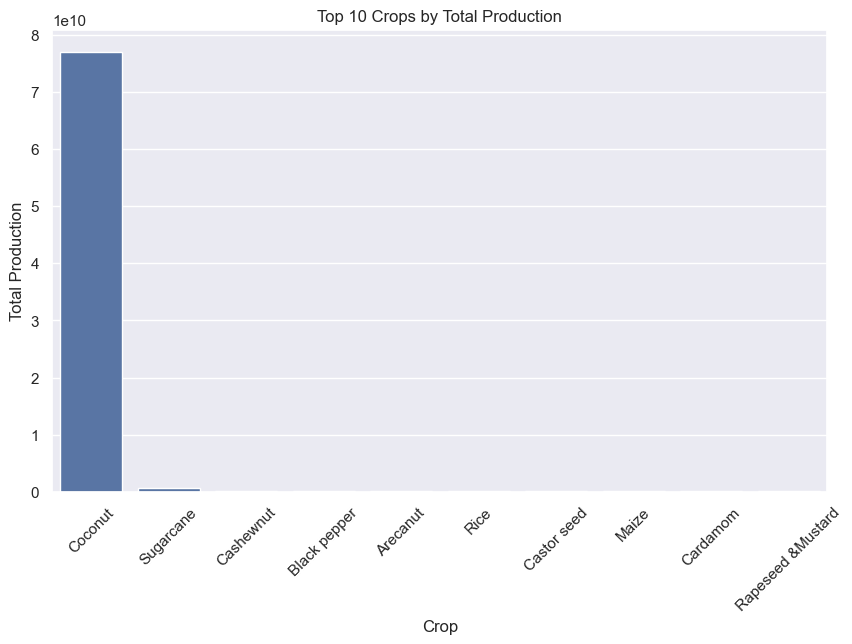

In [58]:
# Top 10 crops by total production
# Sum production by crop
top_crops = TN_dataset.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
print(" the top_crops are :",top_crops)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_crops.index, y=top_crops.values)
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.title('Top 10 Crops by Total Production')
plt.xticks(rotation=45)
plt.show()

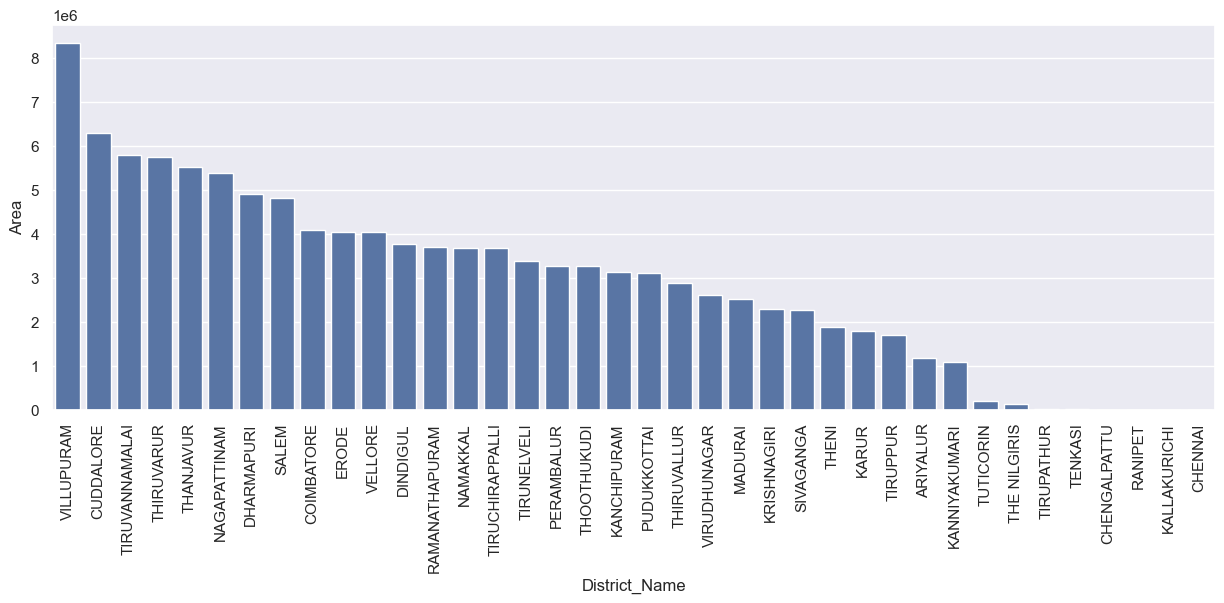

In [59]:
#areawise District.
dist_area=TN_dataset.groupby('District_Name')['Area'].sum().reset_index().sort_values(by='Area',ascending=False).head(50)

#plotting graph for statewise area.
plt.figure(figsize=(15,5))
sns.barplot(x='District_Name',y='Area',data=dist_area)
plt.xticks(rotation=90)
plt.show()

## RICE

In [60]:
#creating new dataframe from existing dataset for analysis.
rice_df = TN_dataset[TN_dataset["Crop"]=="Rice"]
rice_df.head()

,State_Name,State_Code,District_Name,District_Code,Crop,Crop_Code,Crop_Year,Season,Season_Code,Area,Production,Yield
1176,Tamil Nadu,33,COIMBATORE,0,Rice,1,2001-02,Kharif,1,10548,37200.0,3.526735
1177,Tamil Nadu,33,COIMBATORE,0,Rice,1,2002-03,Kharif,1,6577,22152.0,3.368101
1178,Tamil Nadu,33,COIMBATORE,0,Rice,1,2003-04,Kharif,1,3654,10643.0,2.912698
1179,Tamil Nadu,33,CUDDALORE,18,Rice,1,2001-02,Kharif,1,108375,402810.0,3.716817
1180,Tamil Nadu,33,CUDDALORE,18,Rice,1,2002-03,Kharif,1,102336,281708.0,2.752775


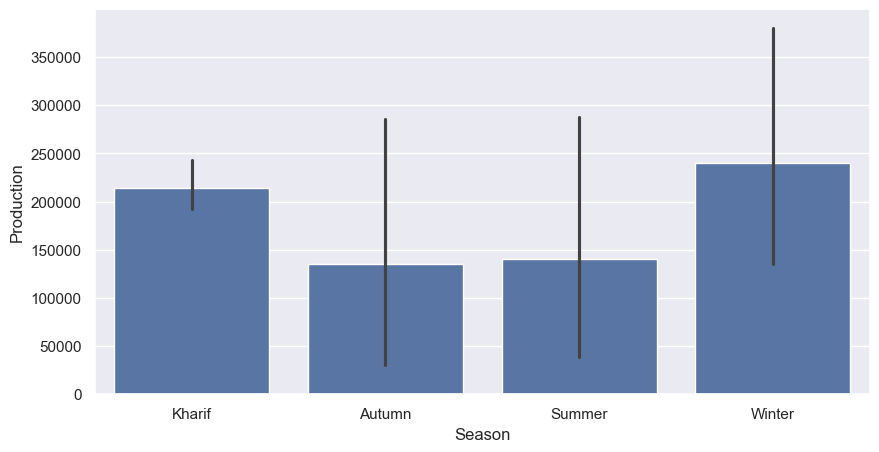

In [61]:
#seasonwise rice production.
plt.figure(figsize=(10,5))
sns.barplot(x = "Season", y = "Production",data=rice_df)
plt.show()

#### Observation:

The barplot shows that rice production varies across different seasons. Production is highest in the Winter season and lowest in the Autumn season. This indicates that the growing season has a significant effect on rice yield in Tamil Nadu, and farmers may optimize output by focusing on high-production seasons.

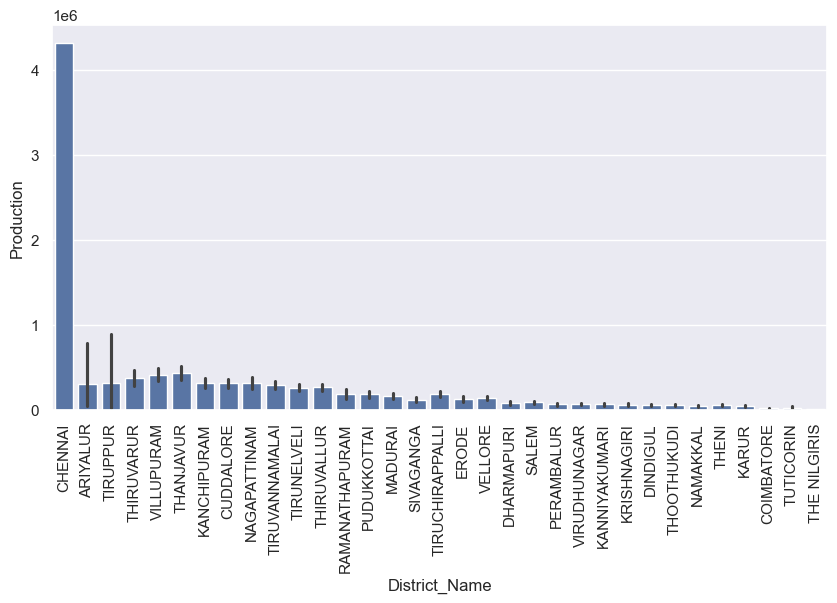

In [62]:
# District wise-Rice Production:
sort_rice=rice_df.sort_values(by='Production',ascending=False)

#plotting bar graph
plt.figure(figsize=(10,5))
sns.barplot(x= "District_Name",y = "Production",data=sort_rice)
plt.xticks(rotation=90)
plt.show()

#### observations :

Chennai has the highest rice production in TAmil nadu  as compare to other districts.
The Nilgiris is least rice production in Tamil nadu.

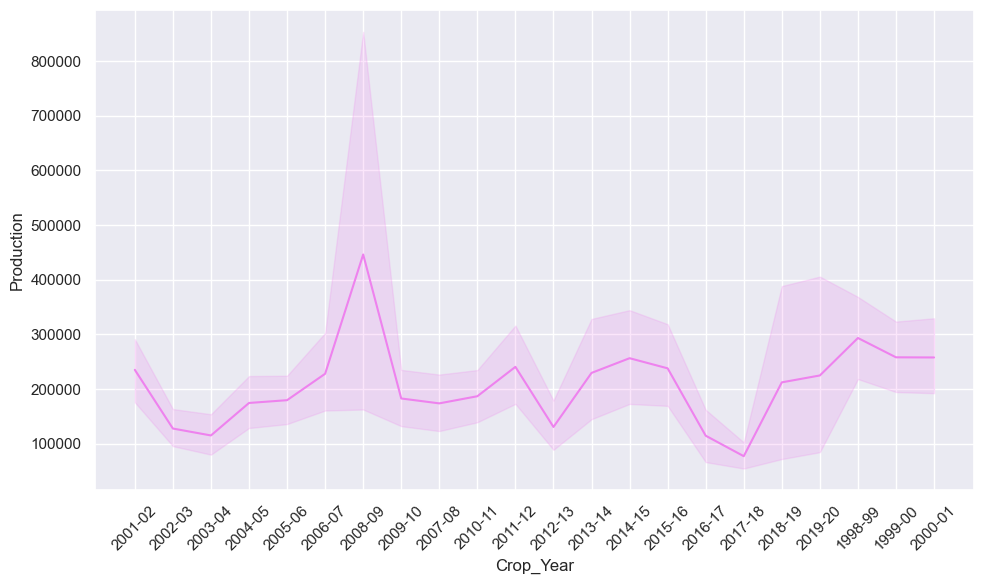

In [63]:
# Rice Production Over the Year:
plt.figure(figsize=(10,6))
sns.lineplot(data=rice_df,x='Crop_Year',y='Production',color='violet')
plt.xticks(rotation=45)  # or 60 or 90
plt.tight_layout()
plt.show()

In [64]:
#areawise district .
state_area=TN_dataset.groupby('District_Name')['Area'].sum().reset_index().sort_values(by='Area',ascending=False)

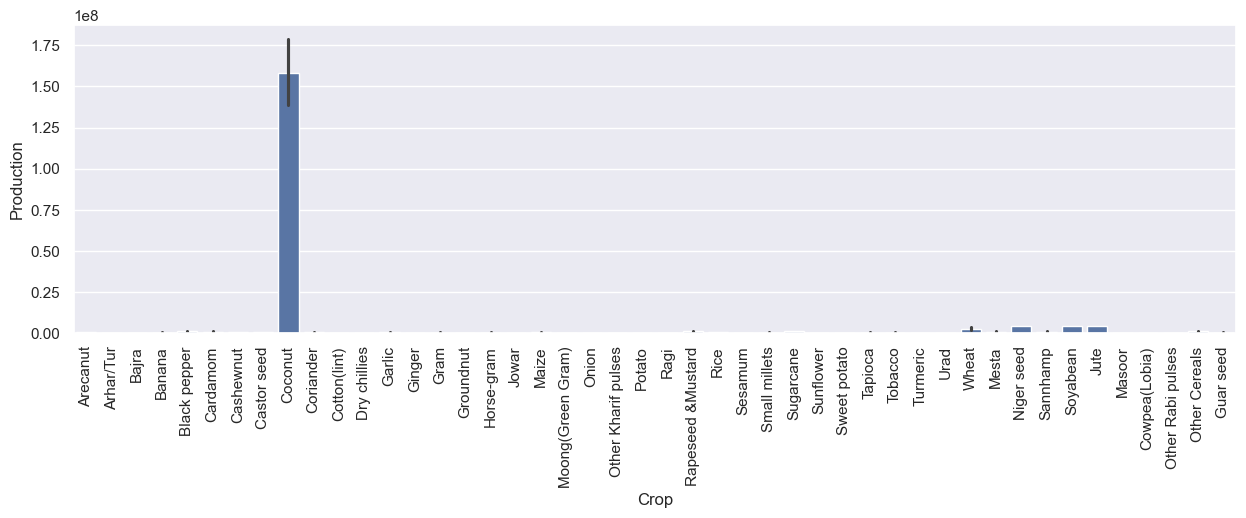

In [65]:
#cropwise production.
plt.figure(figsize=(15,4))
sns.barplot(x='Crop',y='Production',data=TN_dataset)
plt.xticks(rotation=90)
plt.show()

#### Observations :

From here we can observe that coconut has the highest production in all the other crops.

In [66]:
# District-wise production heatmap

In [67]:
print(TN_dataset.columns)

Index(['State_Name', 'State_Code', 'District_Name', 'District_Code', 'Crop',
       'Crop_Code', 'Crop_Year', 'Season', 'Season_Code', 'Area', 'Production',
       'Yield'],
      dtype='object')


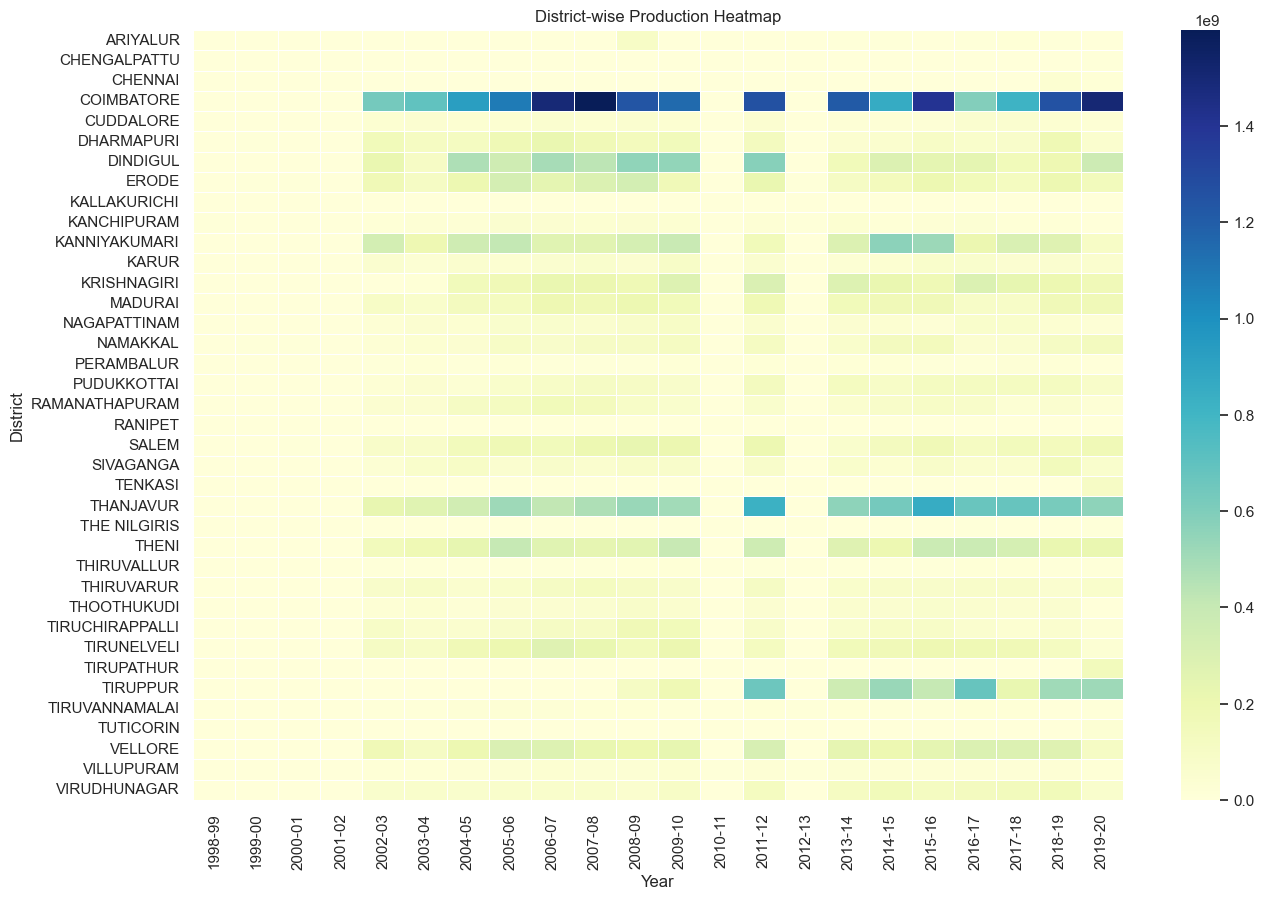

In [68]:
# Pivot table: rows = District, columns = Year, values = Production sum
district_heatmap = TN_dataset.pivot_table(index='District_Name', columns='Crop_Year', values='Production', aggfunc='sum').fillna(0)
plt.figure(figsize=(15,10))
sns.heatmap(district_heatmap, cmap='YlGnBu', linewidths=0.5)
plt.title('District-wise Production Heatmap')
plt.xlabel('Year')
plt.ylabel('District')
plt.show()

#### Observation:

A pivot table of District vs Year with production sums was created.

Visualized using a heatmap: darker colors indicate higher production.

Observation: Districts like Coimbatore show consistently high production across years, while some districts have lower or fluctuating output.

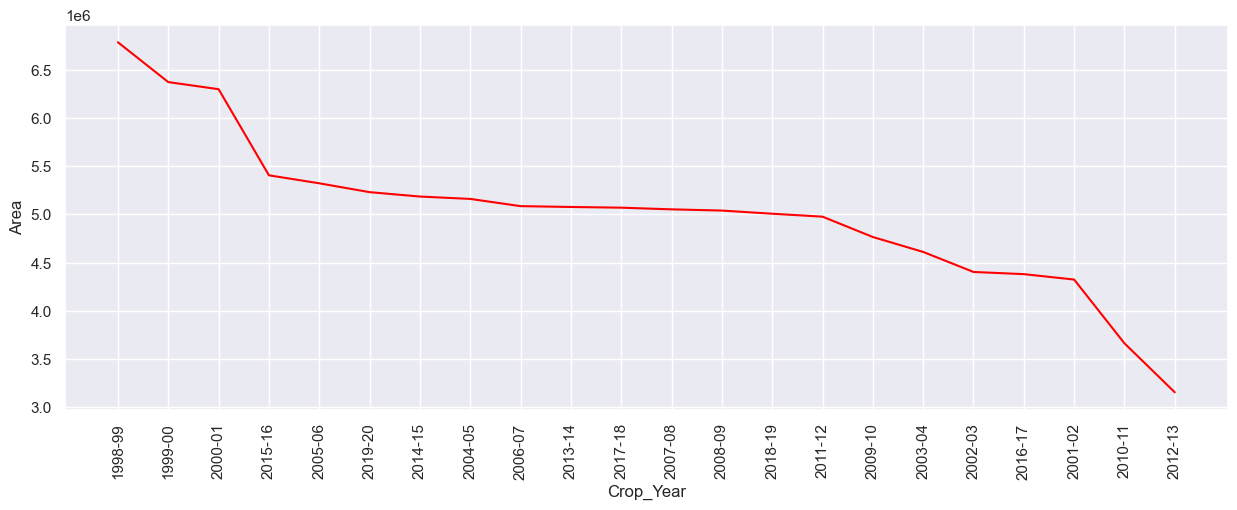

In [69]:
#area vs crop_year
year_area=TN_dataset.groupby('Crop_Year')['Area'].sum().reset_index().sort_values(by='Area',ascending=False)

#plotting graph for statewise area.
plt.figure(figsize=(15,5))
sns.lineplot(x='Crop_Year',y='Area',data=year_area,color='red')
plt.xticks(rotation=90)
plt.show()

#### Observations:-
In the year of 1998 we have largest agricultural area
With the passage of time it comtinues to decreasing.

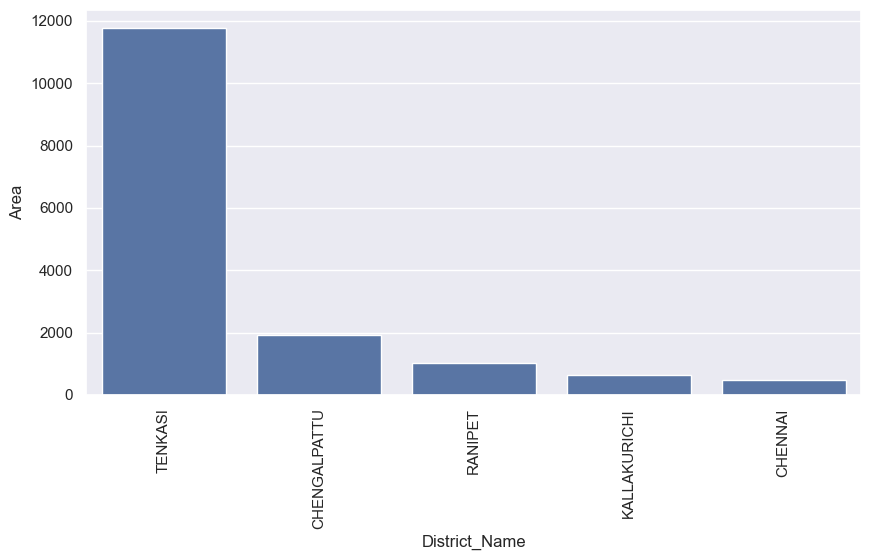

In [70]:
# least 5 districts in agricultural form
state_area=TN_dataset.groupby('District_Name')['Area'].sum().reset_index().sort_values(by='Area',ascending=False).tail()

#plotting graph for statewise area.
plt.figure(figsize=(10,5))
sns.barplot(x='District_Name',y='Area',data=state_area)
plt.xticks(rotation=90)
plt.show()

#### Observation: Least five district name in agricultural land. Chennai has the least agricultural land in tamil nadu.

In [72]:
# Season-wise crop distribution

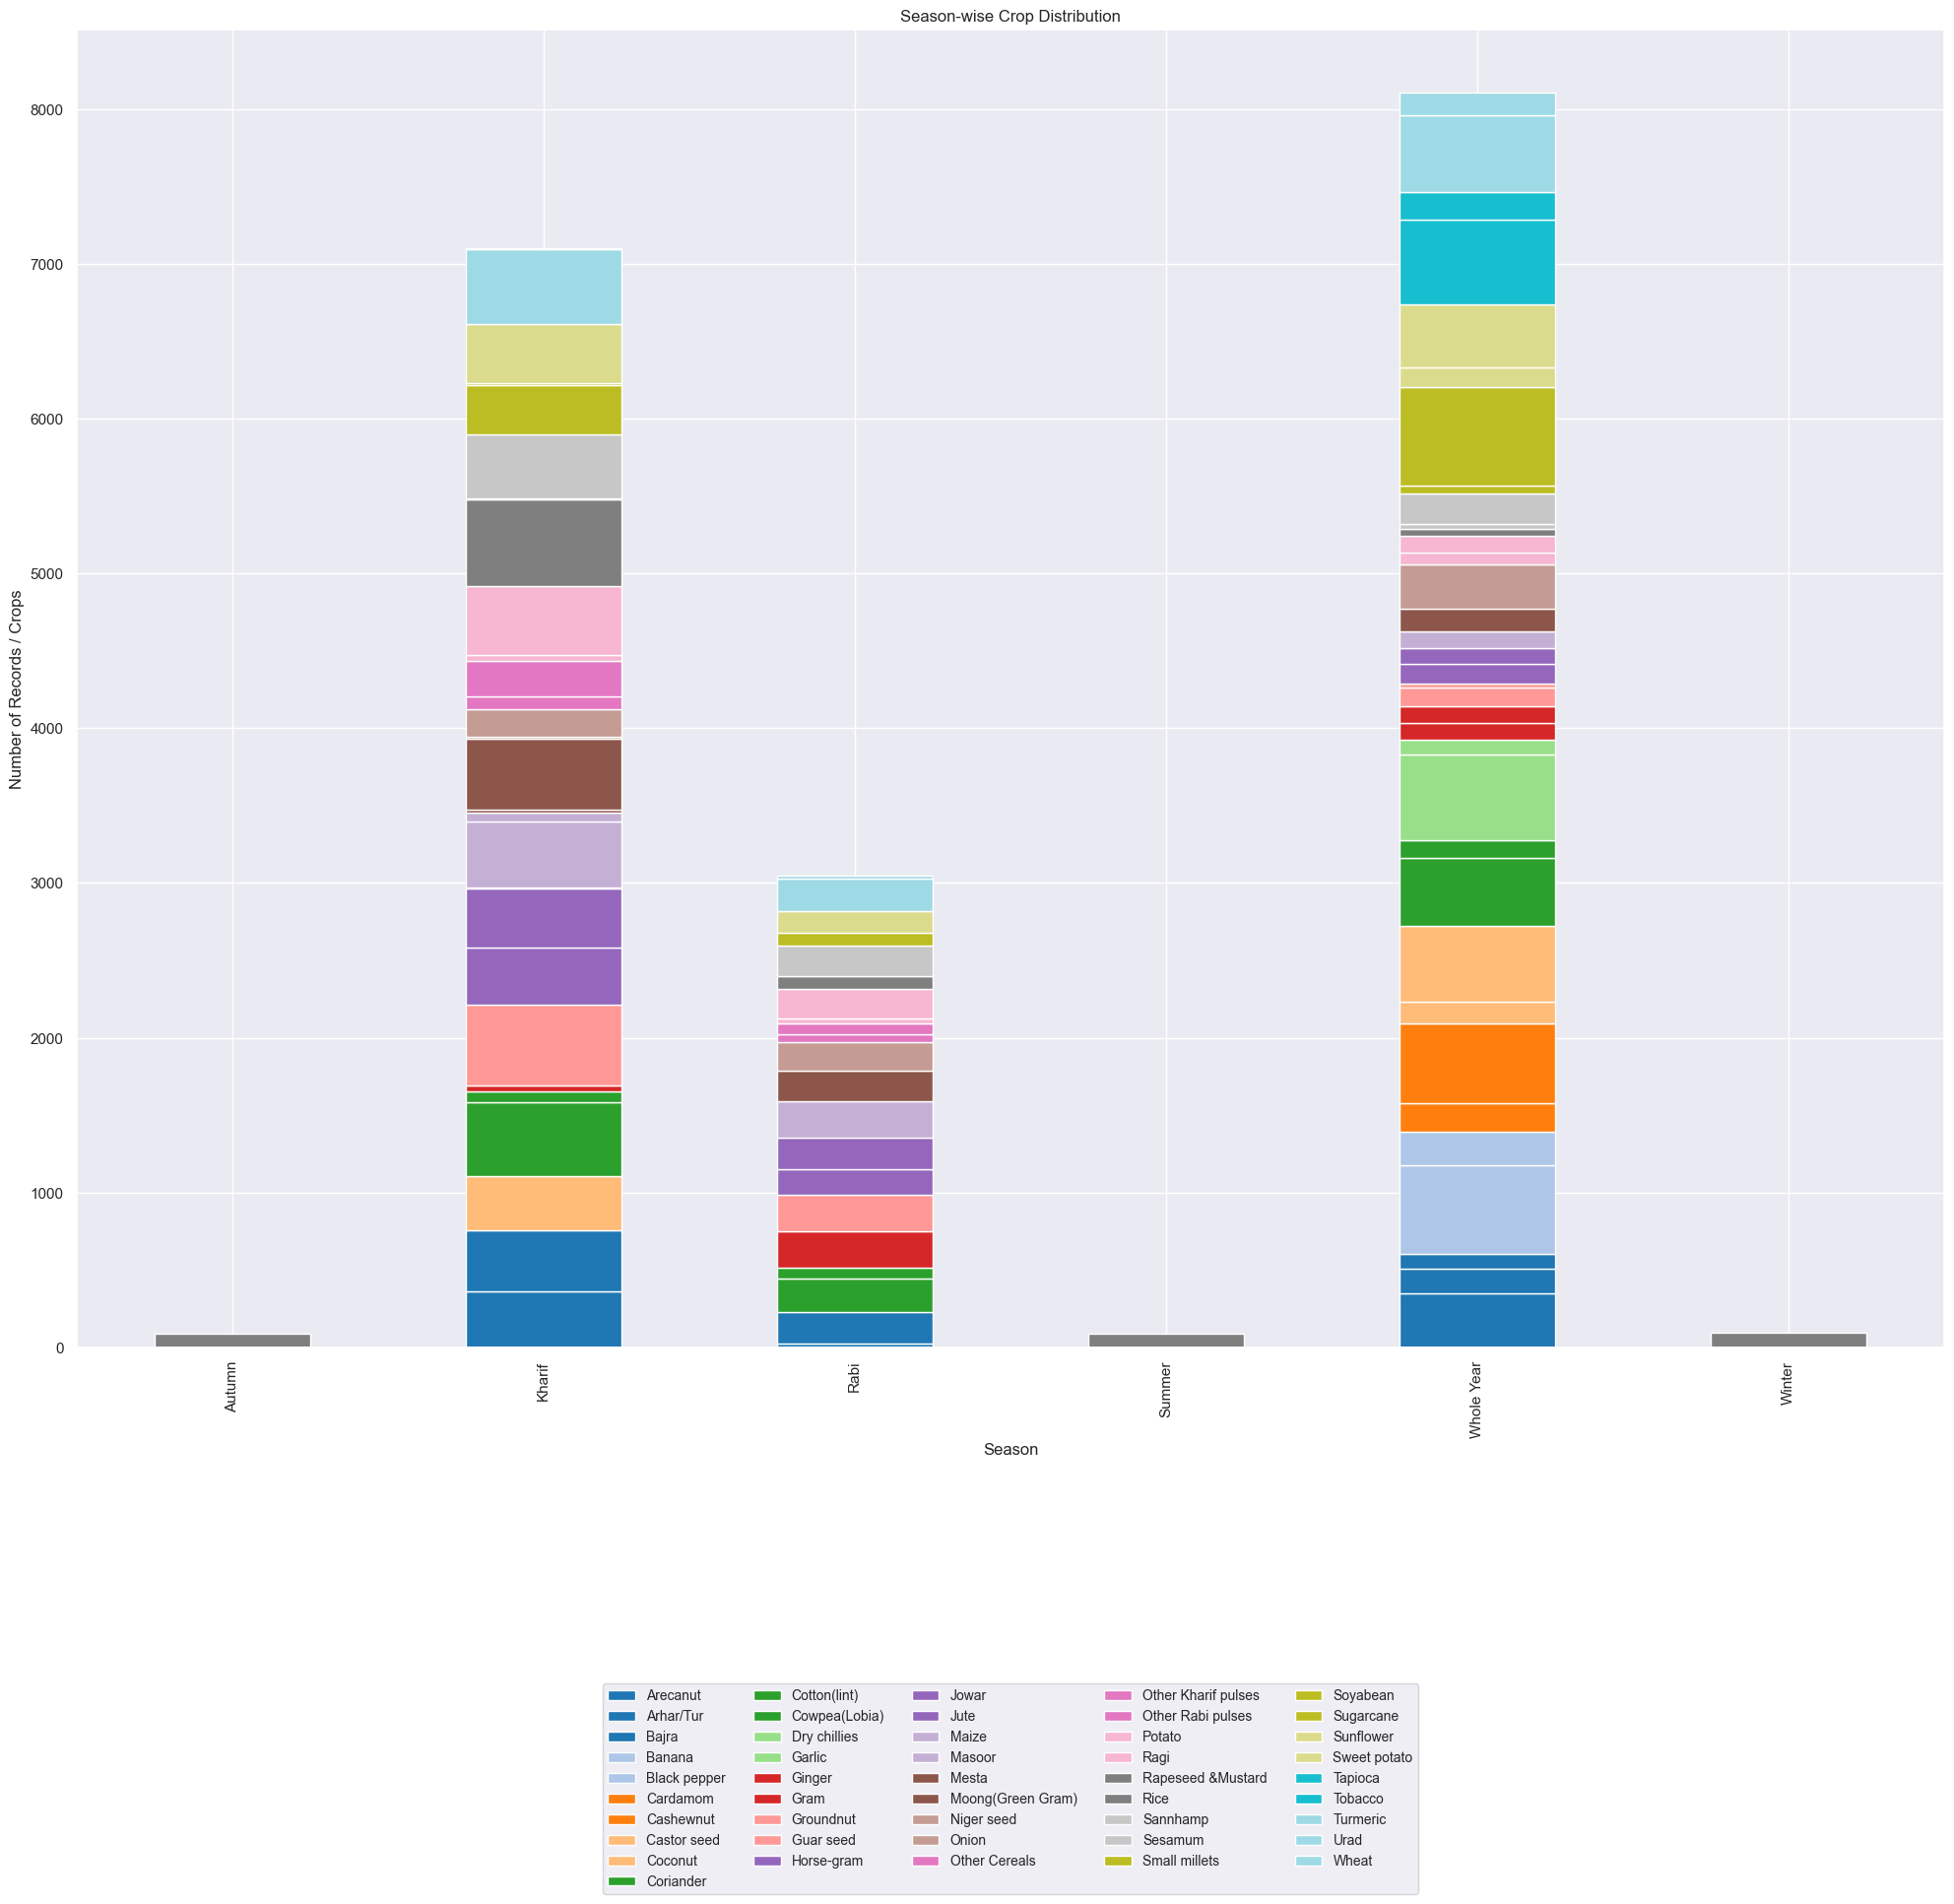

Season
Autumn             Rice
Kharif             Rice
Rabi          Groundnut
Summer             Rice
Whole Year    Sugarcane
Winter             Rice
dtype: object


In [73]:
# Count of crops per season
season_crop = TN_dataset.groupby('Season')['Crop'].value_counts().unstack().fillna(0)
# Plot
ax = season_crop.plot(kind='bar', stacked=True, colormap='tab20', figsize=(20,20))
plt.xlabel('Season')
plt.ylabel('Number of Records / Crops')
plt.title('Season-wise Crop Distribution')

# Horizontal legend below the plot
plt.legend(
    bbox_to_anchor=(0.5, -0.25),  # x=0.5 centers, y=-0.25 below the plot
    loc='upper center',            # align legend above bbox point
    ncol=5,                        # number of columns in legend
    fontsize=10
)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# For each season, the crop with the maximum value
max_crops_per_season = season_crop.idxmax(axis=1)
print(max_crops_per_season)

In [74]:
# Pivot table: rows = Crop, columns = Crop_Year, values = Production sum
crop_year_heatmap = TN_dataset.pivot_table(
    index='Crop_Year', 
    columns='Crop', 
    values='Production', 
    aggfunc='sum'
).fillna(0)

print(crop_year_heatmap.head())

Crop           Arecanut  Arhar/Tur     Bajra     Banana  Black pepper  \
Crop_Year                                                               
1998-99    0.000000e+00    99516.0  309644.0  3649318.0  5.200000e+02   
1999-00    0.000000e+00    62411.0  258774.0  2762324.0  8.648037e+06   
2000-01    0.000000e+00    60293.0  303245.0  2473512.0  4.324407e+06   
2001-02    0.000000e+00    41420.1  152971.0        0.0  0.000000e+00   
2002-03    6.485936e+07    24067.0   88682.0  2836916.0  0.000000e+00   

Crop           Cardamom     Cashewnut   Castor seed       Coconut  \
Crop_Year                                                           
1998-99    3.110000e+02  1.516200e+04  1.462600e+04  0.000000e+00   
1999-00    1.120000e+02  2.034100e+04  1.184300e+04  0.000000e+00   
2000-01    4.324162e+06  1.299222e+07  4.336616e+06  0.000000e+00   
2001-02    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2002-03    0.000000e+00  3.588500e+04  5.600000e+03  2.860700e+09   

Crop

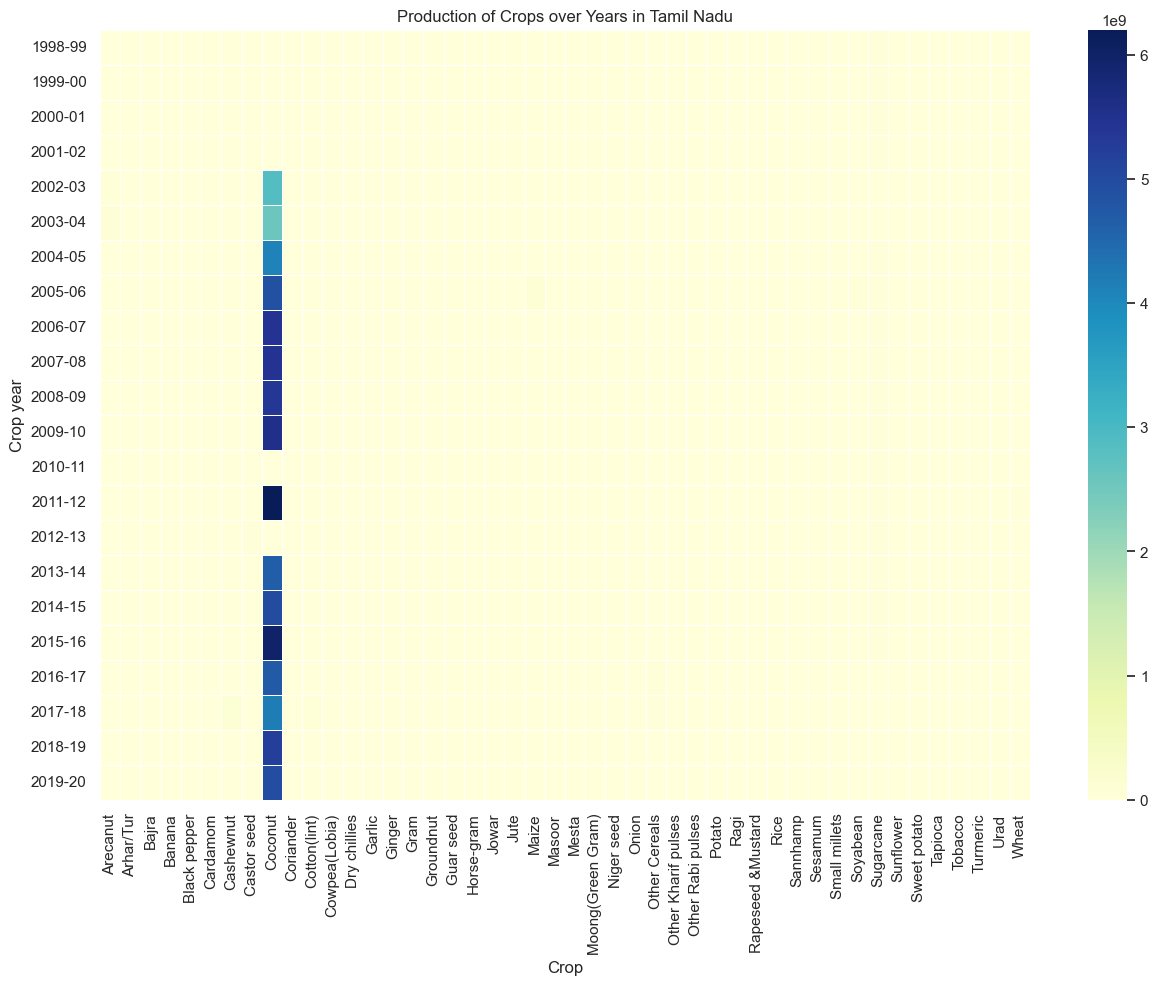

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(crop_year_heatmap, 
            cmap='YlGnBu', 
            linewidths=0.5, 
            annot=False,       # optional: show numbers
            fmt=".0f")        # no decimals

plt.title('Production of Crops over Years in Tamil Nadu')
plt.xlabel('Crop')
plt.ylabel('Crop year')
plt.show()

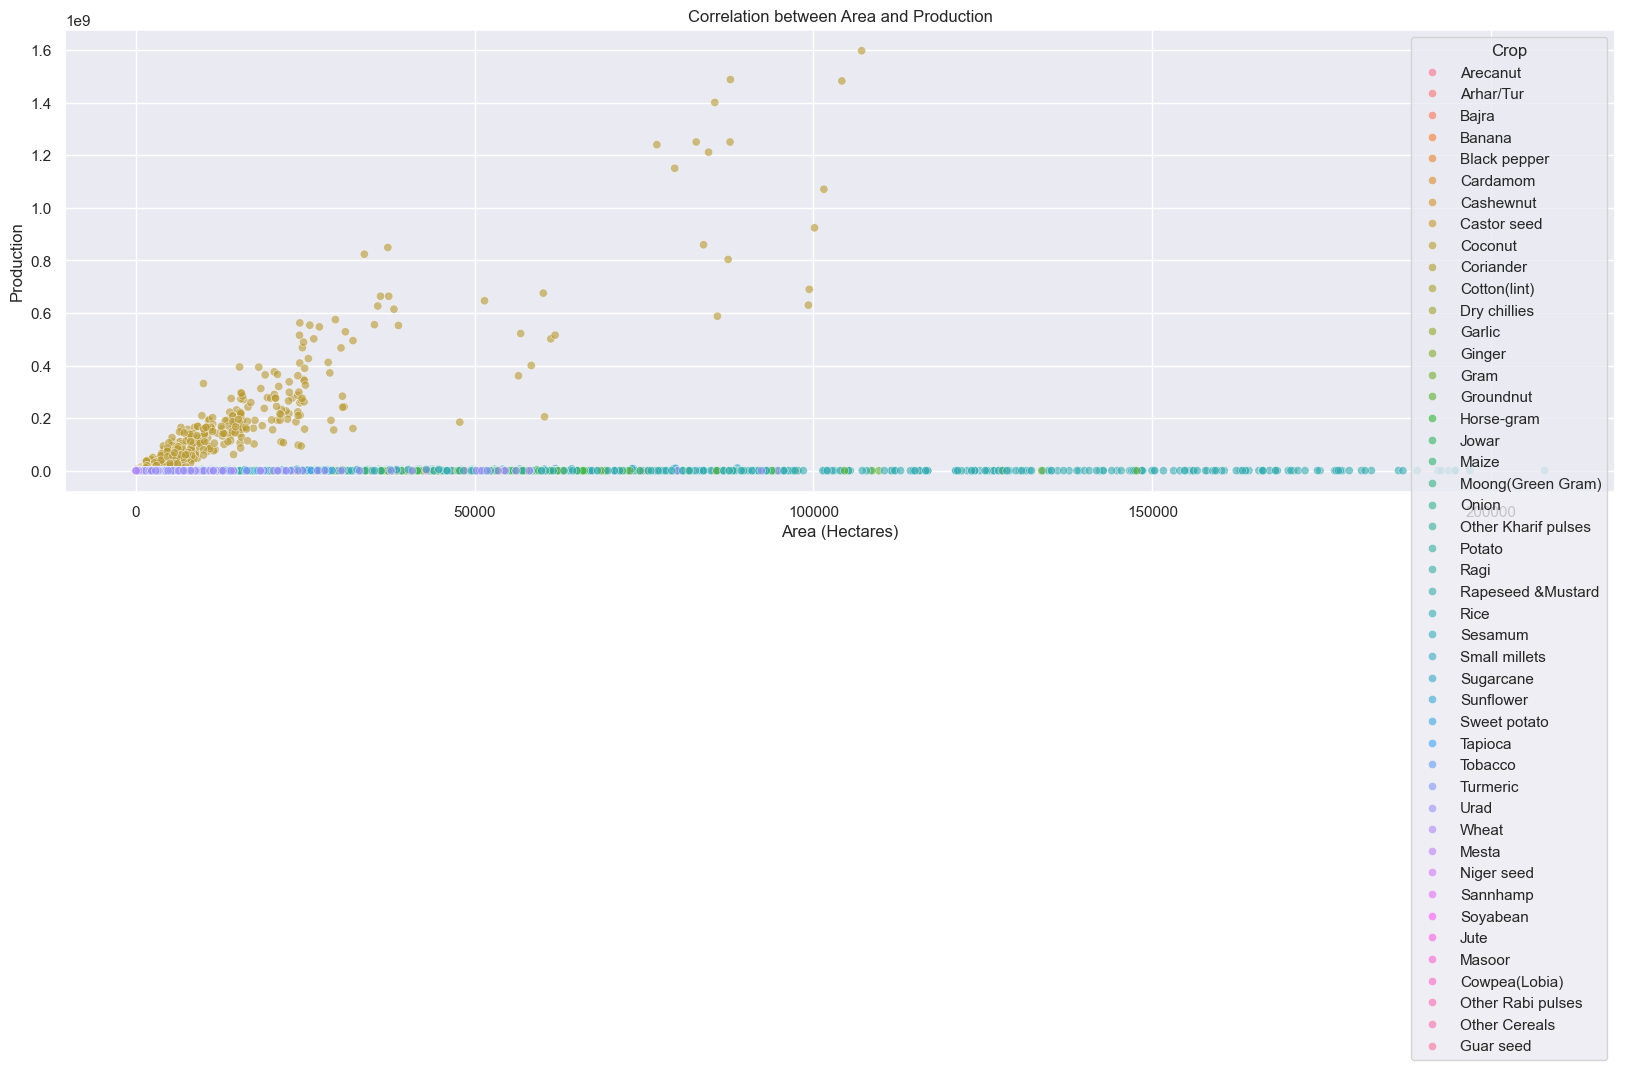

Correlation between Area and Production: 0.16701752565268546


In [76]:
# See if larger cultivated area means higher production.
plt.figure(figsize=(20,6))
sns.scatterplot(data=TN_dataset, x='Area', y='Production', hue='Crop', alpha=0.6)
plt.xlabel('Area (Hectares)')
plt.ylabel('Production')
plt.title('Correlation between Area and Production')
plt.show()

# Correlation coefficient
correlation = TN_dataset['Area'].corr(TN_dataset['Production'])
print("Correlation between Area and Production:", correlation)

### Observations:
Correlation between Area and Production: 0.1670

Essentially, Area explains very little of Production variability in your dataset.

Other factors (like rainfall, crop type, fertilizer use, etc.) may have a bigger influence

In [77]:
# remove outliers from Area and Production 
# scatter plot  for Production and area

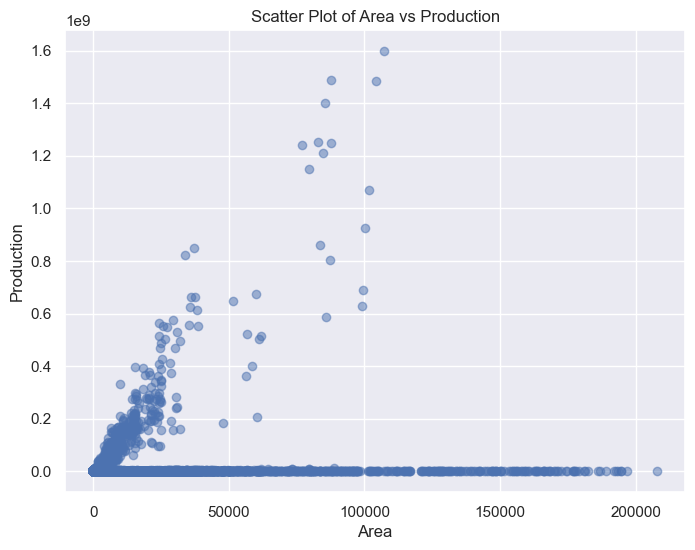

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(TN_dataset['Area'], TN_dataset['Production'], alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Scatter Plot of Area vs Production')
plt.show()

Removing outlier by replace by median 

In [79]:
# function to replace outliers using median 
def replace_outliers_median(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = series.median()
    # Replace values outside bounds with median
    return series.apply(lambda x: median if x < lower or x > upper else x)
    

# Make a copy to be safe
#TN_outlier_replace = TN_dataset_numeric.copy()
TN_outlier_replace = TN_dataset.copy()
# Replace outliers in Area and Production
TN_outlier_replace.loc[:, 'Area'] = replace_outliers_median(TN_outlier_replace['Area'])
TN_outlier_replace.loc[:, 'Production'] = replace_outliers_median(TN_outlier_replace['Production'])

# Check result
TN_outlier_replace[['Area', 'Production']].describe()

print("outlierss are replaced by median ")


outlierss are replaced by median 


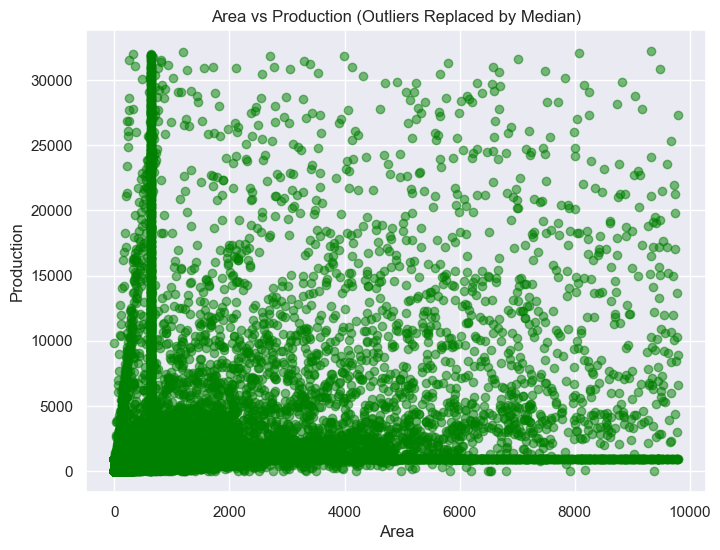

In [80]:
# Scatter plot after removing outliers
plt.figure(figsize=(8,6))
plt.scatter(TN_outlier_replace['Area'], TN_outlier_replace['Production'], alpha=0.5, color='green')
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Area vs Production (Outliers Replaced by Median)')
plt.show()


In [81]:
TN_outlier_replace

,State_Name,State_Code,District_Name,District_Code,Crop,Crop_Code,Crop_Year,Season,Season_Code,Area,Production,Yield
0,Tamil Nadu,33,COIMBATORE,0,Arecanut,2,2002-03,Whole Year,2,1589,970.0,0.000000
1,Tamil Nadu,33,COIMBATORE,0,Arecanut,2,2003-04,Whole Year,2,1577,970.0,0.000000
2,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2,2002-03,Whole Year,2,203,970.0,0.000000
3,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2,2003-04,Whole Year,2,308,970.0,0.000000
4,Tamil Nadu,33,DINDIGUL,2,Arecanut,2,2002-03,Whole Year,2,32,970.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18520,Tamil Nadu,33,NAMAKKAL,8,Wheat,3,1998-99,Rabi,3,250,13.0,0.052000
18521,Tamil Nadu,33,SALEM,10,Wheat,3,1999-00,Rabi,3,25,12.0,0.480000
18522,Tamil Nadu,33,SALEM,10,Wheat,3,2000-01,Rabi,3,25,12.0,0.480000
18523,Tamil Nadu,33,THE NILGIRIS,12,Wheat,3,1998-99,Rabi,3,430,20.0,0.046512


In [82]:
df=TN_outlier_replace.copy()

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()
df[['Area_fit_trans', 'Production_fit_trans']] = scaler.fit_transform(df[['Area', 'Production']])
print(df)

       State_Name  State_Code District_Name  District_Code      Crop  \
0      Tamil Nadu          33    COIMBATORE              0  Arecanut   
1      Tamil Nadu          33    COIMBATORE              0  Arecanut   
2      Tamil Nadu          33    DHARMAPURI              1  Arecanut   
3      Tamil Nadu          33    DHARMAPURI              1  Arecanut   
4      Tamil Nadu          33      DINDIGUL              2  Arecanut   
...           ...         ...           ...            ...       ...   
18520  Tamil Nadu          33      NAMAKKAL              8     Wheat   
18521  Tamil Nadu          33         SALEM             10     Wheat   
18522  Tamil Nadu          33         SALEM             10     Wheat   
18523  Tamil Nadu          33  THE NILGIRIS             12     Wheat   
18524  Tamil Nadu          33  THE NILGIRIS             12     Wheat   

       Crop_Code Crop_Year      Season  Season_Code  Area  Production  \
0              2   2002-03  Whole Year            2  1589     

In [85]:
# simple Linear Regression 
df.head()

,State_Name,State_Code,District_Name,District_Code,Crop,Crop_Code,Crop_Year,Season,Season_Code,Area,Production,Yield,Area_fit_trans,Production_fit_trans
0,Tamil Nadu,33,COIMBATORE,0,Arecanut,2,2002-03,Whole Year,2,1589,970.0,0.0,0.162107,0.030122
1,Tamil Nadu,33,COIMBATORE,0,Arecanut,2,2003-04,Whole Year,2,1577,970.0,0.0,0.160882,0.030122
2,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2,2002-03,Whole Year,2,203,970.0,0.0,0.020621,0.030122
3,Tamil Nadu,33,DHARMAPURI,1,Arecanut,2,2003-04,Whole Year,2,308,970.0,0.0,0.031339,0.030122
4,Tamil Nadu,33,DINDIGUL,2,Arecanut,2,2002-03,Whole Year,2,32,970.0,0.0,0.003165,0.030122


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [87]:
# independent variable : State_name, Crop_year , Season , Crop, Area
#dependent variable : Production 

# for SLR Area and Production need 
#sample_df = df.sample(1000, random_state=42)
X = np.array(df['Area']).reshape(-1,1)
Y = np.array(df['Production']).reshape(-1,1)


In [88]:
Y

array([[970.],
       [970.],
       [970.],
       ...,
       [ 12.],
       [ 20.],
       [ 44.]], shape=(18525, 1))

In [89]:
X

array([[1589],
       [1577],
       [ 203],
       ...,
       [  25],
       [ 430],
       [  91]], shape=(18525, 1))

In [90]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

In [91]:
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

In [92]:
X_scaled

array([[ 0.131],
       [ 0.125],
       [-0.546],
       ...,
       [-0.633],
       [-0.435],
       [-0.601]], shape=(18525, 1))

In [93]:
Y_scaled

array([[-0.311],
       [-0.311],
       [-0.311],
       ...,
       [-0.488],
       [-0.486],
       [-0.482]], shape=(18525, 1))

In [94]:
model = LinearRegression()

In [95]:
model.fit(X_scaled,Y_scaled)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
Y_pred_scaled = model.predict(X_scaled)

In [97]:
Y_pred_scaled

array([[ 0.038],
       [ 0.036],
       [-0.158],
       ...,
       [-0.183],
       [-0.126],
       [-0.173]], shape=(18525, 1))

In [98]:
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)

In [99]:
Y_pred

array([[2853.883],
       [2844.732],
       [1796.957],
       ...,
       [1661.219],
       [1970.061],
       [1711.549]], shape=(18525, 1))

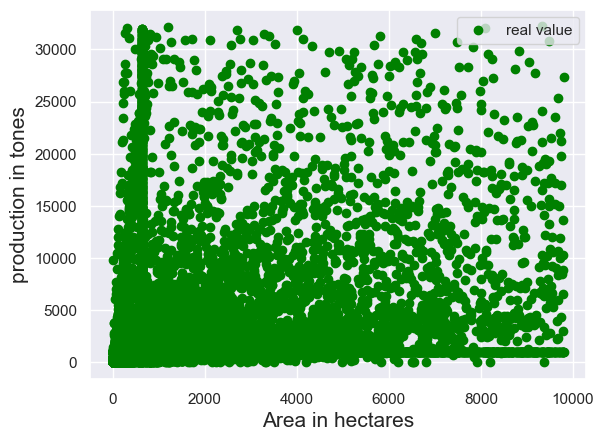

In [100]:
plt.scatter(X,Y,color = 'green' , label = 'real value')
plt.xlabel('Area in hectares',fontsize = 15)
plt.ylabel('production in tones', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()

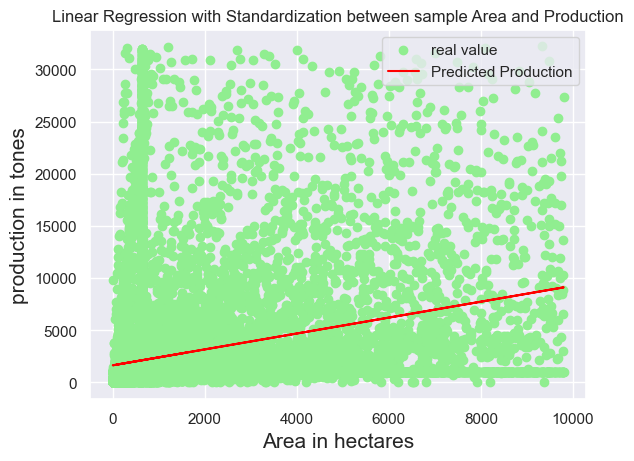

In [101]:
plt.scatter(X,Y,color = 'lightgreen' , label = 'real value')
plt.plot(X,Y_pred,color = 'red',label = 'Predicted Production')
plt.xlabel('Area in hectares',fontsize = 15)
plt.ylabel('production in tones', fontsize = 15)
plt.title('Linear Regression with Standardization between sample Area and Production')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
import statsmodels.api as sm

In [103]:
# OLS - Oridnary Least Square -it’s for a deeper statistical understanding of the same regression.

X_stats = df[['Area']]
Y_stats = df['Production']

# Add constant for intercept
X_stats = sm.add_constant(X)

model = sm.OLS(Y_stats, X_stats).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1685.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:40:53   Log-Likelihood:            -1.8471e+05
No. Observations:               18525   AIC:                         3.694e+05
Df Residuals:                   18523   BIC:                         3.694e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1642.1546     45.257     36.285      0.0

### Observation: 

"Increasing Area slightly increases Production, and this effect is statistically significant. But since the R² is very low (0.083), Area alone cannot explain most of the variation in Production. Other factors should be included for better prediction."

So, we should move next to a Multiple Linear Regression (MLR) model, including more features like District Code, Crop Code, Season Code  and Crop_Year to capture other influences.

In [104]:
df['Yield']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
18520    0.052000
18521    0.480000
18522    0.480000
18523    0.046512
18524    0.483516
Name: Yield, Length: 18525, dtype: float64

In [105]:
# Multiple  linear regression 
# independent variable : Crop_Year, Season_Code , Crop_Code , District_Code , 
# dependent variable  :  Yield , Production

In [106]:
X_mlr = df[['Crop_Code','District_Code', 'Area']]
Y_mlr = df['Production']

In [107]:
X_mlr.head()

,Crop_Code,District_Code,Area
0,2,0,1589
1,2,0,1577
2,2,1,203
3,2,1,308
4,2,2,32


In [108]:
Y_mlr.head()

0    970.0
1    970.0
2    970.0
3    970.0
4    970.0
Name: Production, dtype: float64

In [109]:
X_const = sm.add_constant(X_mlr)

# Build and fit OLS model
mlr_ols = sm.OLS(Y_mlr, X_const).fit()

# Display detailed summary
mlr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     579.5
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:40:53   Log-Likelihood:            -1.8468e+05
No. Observations:               18525   AIC:                         3.694e+05
Df Residuals:                   18521   BIC:                         3.694e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2068.0041    114.885     18.001      0.000    1842.818    2293.190
Crop_Code         5.6003     46.838      0.120      0.905     -86.206      97.407
District_Code   -29.6625      4.218     -7.033      0.000     -37.930     -21.395
Area              0.7608      0.019     40.989      0.000       0.724       0.797
==============================================================================
Omnibus:                    12098.913   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122308.214
Skew:                           3.138   Prob(JB):                         0.00
Kurtosis:                      13.912   Cond. No.                     7.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MLR_OLR Observation :
    Production increases significantly with Area, and slightly decreases with certain districts. Crop type does not have a significant effect. However, the model explains only 8.6% of the variation in Production, indicating that other factors are more influential.


Visualize Predictions

Plot predicted vs actual values to see if predictions align with reality.

Residual plot: Check if residuals are randomly scattered (no pattern).

Highlight outliers if necessary—they may affect your model.

In [110]:
sample_X_mlr = X_mlr.copy()

In [111]:
sample_X_mlr

,Crop_Code,District_Code,Area
0,2,0,1589
1,2,0,1577
2,2,1,203
3,2,1,308
4,2,2,32
...,...,...,...
18520,3,8,250
18521,3,10,25
18522,3,10,25
18523,3,12,430


In [112]:
X = TN_dataset[['Area','Crop_Code','District_Code']]
X_con = sm.add_constant(X)
model = sm.OLS(TN_dataset['Production'], X_con).fit()
y_pred = model.predict(X_con)  # ✅ matches model shape

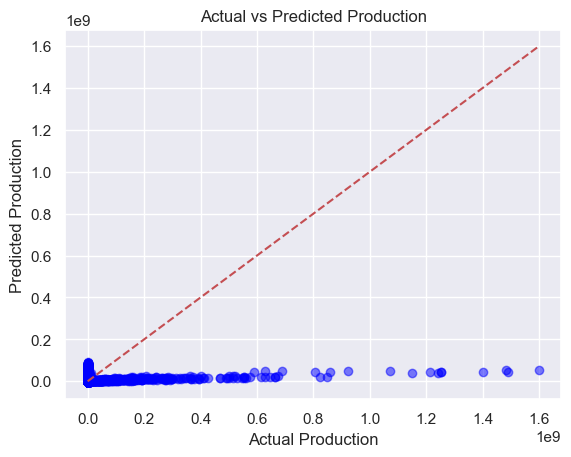

In [113]:
y_true = TN_dataset['Production']
plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Production")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # diagonal line
plt.show()

### Observations from the scatter plot:

1. Points are clustered near zero

Most of the data points have relatively low Production values compared to the scale of the plot (up to 1.6e9).

This suggests that a few extreme values (outliers) are stretching the axis, making the bulk of points appear compressed near the origin.

2. Predicted vs Actual values

The red dashed line represents perfect prediction (y_pred = y_true).

Most blue points are far below this line, meaning the model underpredicts large Production values and is not capturing the variability well.

3.Spread

There’s a very weak correlation between predicted and actual Production for the majority of data.

The model predicts better for small Production values but fails for extremely high values (outliers).

In [115]:
# PRedict Rice Production 
rice_df = df[df['Crop'] == 'Rice']

In [116]:
rice_df

,State_Name,State_Code,District_Name,District_Code,Crop,Crop_Code,Crop_Year,Season,Season_Code,Area,Production,Yield,Area_fit_trans,Production_fit_trans
1176,Tamil Nadu,33,COIMBATORE,0,Rice,1,2001-02,Kharif,1,629,970.0,3.526735,0.064108,0.030122
1177,Tamil Nadu,33,COIMBATORE,0,Rice,1,2002-03,Kharif,1,6577,22152.0,3.368101,0.671294,0.687908
1178,Tamil Nadu,33,COIMBATORE,0,Rice,1,2003-04,Kharif,1,3654,10643.0,2.912698,0.372907,0.330507
1179,Tamil Nadu,33,CUDDALORE,18,Rice,1,2001-02,Kharif,1,629,970.0,3.716817,0.064108,0.030122
1180,Tamil Nadu,33,CUDDALORE,18,Rice,1,2002-03,Kharif,1,629,970.0,2.752775,0.064108,0.030122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17923,Tamil Nadu,33,VILLUPURAM,28,Rice,1,1999-00,Kharif,1,629,970.0,3.422357,0.064108,0.030122
17924,Tamil Nadu,33,VILLUPURAM,28,Rice,1,2000-01,Kharif,1,629,970.0,3.515748,0.064108,0.030122
17925,Tamil Nadu,33,VIRUDHUNAGAR,17,Rice,1,1998-99,Kharif,1,629,970.0,3.429605,0.064108,0.030122
17926,Tamil Nadu,33,VIRUDHUNAGAR,17,Rice,1,1999-00,Kharif,1,629,970.0,3.724071,0.064108,0.030122


In [117]:
X = rice_df[['Area','Crop_Code','District_Code']]
X_con = sm.add_constant(X)
model = sm.OLS(rice_df['Production'], X_con).fit()
y_pred = model.predict(X_con)  # ✅ matches model shape

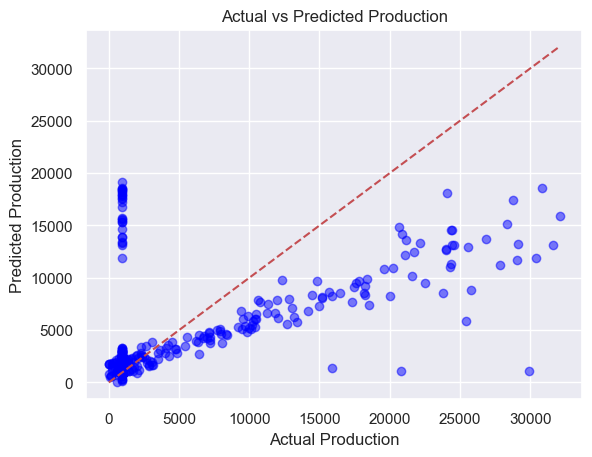

In [118]:
y_true = rice_df['Production']
plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Production")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # diagonal line
plt.show()

# Observation:

        * The scatter plot between actual and predicted rice production values shows that the data points are not closely aligned along the diagonal line, indicating an imperfect prediction by the MLR model.
        * This means the model’s estimated production values differ from the actual ones for many observations.
        * The wide spread of points suggests that the model does not fully capture the relationship between the independent variables and production.
        * Therefore, the model may require improvement by adding more relevant predictors (e.g., area, rainfall, fertilizer use) or by refining the data preprocessing steps.

         * The scatter plot shows that the MLR model predictions deviate from actual production values, indicating a low model accuracy and imperfect fit. Additional variables or better data processing are needed to improve prediction performance.

# Project Conclusion : “Crop Production Prediction in Tamil Nadu.”

    * The project analyzed and predicted crop production in Tamil Nadu using data preprocessing, normalization, and regression techniques.

    * Outliers were handled and data cleaned for accurate analysis.

    * Seasonal and yearly trends were explored, showing variation in rice production across seasons.

    * The MLR model gave a low R² value (0.008), indicating imperfect predictions.

    * Overall, the study highlights that adding features like rainfall, area, and soil type can improve prediction accuracy in future models.